<a href="https://colab.research.google.com/github/danielamll/PIA_RED_NEURONALES/blob/main/PIAREDESINCEPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFORMACIÓN DE LA GPU

In [ ]:
#información de la gpu que se usa para correr la red neuronal
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 17 19:52:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# INSTALACIÓN DE KAGGLE POR API PARA DESCARGA DE DATASETS

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           7747       1019  0.9375           
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           5135        131  1.0              
muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1494        832  0.875            
paradisejoy/top-hits-spotify-from-20002019   

In [ ]:
! kaggle datasets download "aryashah2k/breast-ultrasound-images-dataset" --force

 87% 169M/195M [00:01<00:00, 173MB/s]
100% 195M/195M [00:01<00:00, 166MB/s]


In [ ]:
! unzip 'breast-ultrasound-images-dataset'

Archive:  breast-ultrasound-images-dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: Data

# IMPORTAR LIBRERIAS


In [ ]:
import numpy as np
import pandas as pd
import os, glob

In [ ]:

from tensorflow import keras
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import layers, activations, optimizers, losses, metrics, initializers
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV3Small, MobileNet, InceptionV3, EfficientNetB7
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3

#PREPARACÓN DE PARÁMETROS Y PREAPRACIÓN DE DATASET PARA FUNCIONAMIENTO

In [ ]:
seed = 42 #random seed para siempre tener las mismas imagenes divididas al azar manteniendo los mismos sets (referencia a hitchhikers guide to the universe)
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
dir_path = r'/content/Dataset_BUSI_with_GT'
IMAGE_SHAPE = (244, 244)

In [ ]:
def prepare_image(file):
    img = image.load_img(file, target_size=IMAGE_SHAPE)
    img_array = image.img_to_array(img)
    return tf.keras.applications.efficientnet.preprocess_input (img_array)


In [ ]:
directories = os.listdir(dir_path)  #funión para lectura de los documentos dentro de todos los folders

files = [] # lista para guardar las imagenes 
labels = [] # lista para guardar las etiquetas las cuales corresopnden al folder de donde vienen

In [ ]:
for folder in directories:
    
    fileList = glob.glob(dir_path + '/'+ folder + '/*')
    labels.extend([folder for l in fileList])
    files.extend(fileList)
pruebali = [labels[:5]]
pruebalf = [labels[-5:]]
print(pruebali)
print(pruebalf)
prueba = [files[:5]]
print(prueba)

len(files), len(labels)

[['malignant', 'malignant', 'malignant', 'malignant', 'malignant']]
[['benign', 'benign', 'benign', 'benign', 'benign']]
[['/content/Dataset_BUSI_with_GT/malignant/malignant (71).png', '/content/Dataset_BUSI_with_GT/malignant/malignant (38).png', '/content/Dataset_BUSI_with_GT/malignant/malignant (109).png', '/content/Dataset_BUSI_with_GT/malignant/malignant (155)_mask.png', '/content/Dataset_BUSI_with_GT/malignant/malignant (91).png']]


(1578, 1578)

In [ ]:
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if '_mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)
#eliminar las máscaras para trabajar únicamente con las imágenes 
    
len(selected_files), len(selected_labels)

(780, 780)

In [ ]:
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if 'mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)#guardar nueva lista sin máscaras

    
len(selected_files), len(selected_labels)

(780, 780)

In [ ]:
#crear diccionario para imagen y su etiqueta (objeto y su llave)
images = {'image': [], 'target': []}
print('preparing the image...')

for i, (file, label) in enumerate(zip(files, labels)):
    images['image'].append(prepare_image(file))
    images['target'].append(label)

print('finished')

preparing the image...
finished


In [ ]:
#convertir las listas en un numpyarray para poder trabajar con ellas para la división de set de entrenamiento y set de prueba
images['image'] = np.array(images['image'])
images['target'] = np.array(images['target'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

images['target'] = le.fit_transform(images['target'])

classes = le.classes_
print(f'the target classes are: {classes}')

#SPLIT THE DATA TO TRAIN AND TEST
x_train, x_test, y_train, y_test = train_test_split(images['image'], images['target'], test_size = .25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


the target classes are: ['benign' 'malignant' 'normal']
(1183, 244, 244, 3) (395, 244, 244, 3) (1183,) (395,)


# CONSTRUCCION DE CNN MODELO EFICIENTENETB7

In [ ]:
base_model = InceptionV3(include_top = False, weights = 'imagenet', input_shape = (*IMAGE_SHAPE, 3), classes = 3)

base_model.trainable = False #Evitar cambios en el model base, congela los pesos de las capas
x = base_model.output

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
#Capas de convolución
x = layers.Conv2D(256, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# AGREGAR MODELO CNN

In [ ]:
#Capas completamente conectadas
x = layers.Flatten()(x) 
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)




x = layers.Dense(3, 'softmax')(x) #siempre se termina en una capa densa

incept_model = keras.models.Model(inputs = base_model.input, outputs = x)

#Compilación del modelo
incept_model.compile(optimizer=optimizers.RMSprop(.001), loss = losses.sparse_categorical_crossentropy, metrics= [metrics.SparseCategoricalAccuracy()])

print(incept_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 121, 121, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 121, 121, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
earlyStop = keras.callbacks.EarlyStopping(patience=60) 
best_model = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True) 

with tf.device('/cpu:0'):
    history = incept_model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), callbacks=[earlyStop, best_model]) 

hist = history.history



Epoch 1/5
37/37 [==============================] - 185s 5s/step - loss: 0.6925 - sparse_categorical_accuracy: 0.6940 - val_loss: 0.9897 - val_sparse_categorical_accuracy: 0.5949
Epoch 2/5
37/37 [==============================] - 178s 5s/step - loss: 0.5260 - sparse_categorical_accuracy: 0.7802 - val_loss: 1.0428 - val_sparse_categorical_accuracy: 0.6684
Epoch 3/5
37/37 [==============================] - 177s 5s/step - loss: 0.4435 - sparse_categorical_accuracy: 0.8157 - val_loss: 1.0963 - val_sparse_categorical_accuracy: 0.6506
Epoch 4/5
37/37 [==============================] - 171s 5s/step - loss: 0.4222 - sparse_categorical_accuracy: 0.8301 - val_loss: 0.8858 - val_sparse_categorical_accuracy: 0.7165
Epoch 5/5
37/37 [==============================] - 169s 5s/step - loss: 0.3475 - sparse_categorical_accuracy: 0.8580 - val_loss: 1.0564 - val_sparse_categorical_accuracy: 0.6835


#RESULTADOS

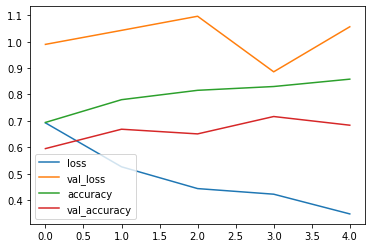

In [ ]:
hist = history.history

plt.plot(hist['loss'], label=  'loss')
plt.plot(hist['val_loss'], label = 'val_loss')
plt.plot(hist['sparse_categorical_accuracy'], label='accuracy')
plt.plot(hist['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.legend()